In [31]:
!pip install torch-dreams==2.0.3

In [2]:
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
import torchvision.models as models
from torch_dreams.dreamer import dreamer

In [52]:
model = models.inception_v3(pretrained=True)
dreamy_boi = dreamer(model, device = 'cuda', quiet = True)

layers_to_use = [model.Mixed_6b.branch1x1.conv]

In [53]:
def make_custom_func(layer_number = 0, channel_number= 0): 
    def custom_func(layer_outputs):
        loss = layer_outputs[layer_number][channel_number].mean()
        return -loss
    return custom_func

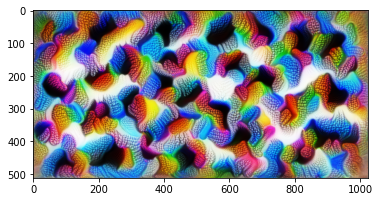

In [118]:
my_custom_func = make_custom_func(layer_number= 0, channel_number = 184)  ## 119

image_param = dreamy_boi.render(
    width = 1024,
    height = 512,
    scale_min = 0.2,
    layers = layers_to_use,
    custom_func = my_custom_func,
    iters = 150
)
plt.imshow(image_param)
plt.show()

In [119]:
import imageio
def get_video_writer(filename, framerate):
    w = imageio.get_writer(filename, fps=framerate,)
    return w

In [120]:
custom_func_a = make_custom_func(layer_number= 0, channel_number = 119)
custom_func_b = make_custom_func(layer_number= 0, channel_number = 19)

In [127]:
w = get_video_writer('save_large.mp4', 60)

from torch_dreams.auto_image_param import auto_image_param

image_param = auto_image_param(height = 512, width = 1024, standard_deviation= 0.01, device = 'cuda')

for i in tqdm(range(160)):
    image_param =  dreamy_boi.render(
        image_parameter= image_param,
        layers = layers_to_use,
        custom_func = my_custom_func,
        iters = 1,
        weight_decay = 1e-2
        )
    frame = (image_param.to_hwc_tensor()*255).to(torch.uint8).numpy()
    w.append_data(frame)

for i in tqdm(range(160)):
    image_param =  dreamy_boi.render(
        image_parameter= image_param,
        layers = layers_to_use,
        custom_func = custom_func_a,
        iters = 1,
        weight_decay = 1e-2
        )
    frame = (image_param.to_hwc_tensor()*255).to(torch.uint8).numpy()
    w.append_data(frame)


100%|██████████| 160/160 [00:08<00:00, 17.79it/s]


In [128]:
for i in tqdm(range(160)):
    image_param =  dreamy_boi.render(
        image_parameter= image_param,
        layers = layers_to_use,
        custom_func = custom_func_b,
        iters = 1,
        weight_decay = 1e-1
        )
    frame = (image_param.to_hwc_tensor()*255).to(torch.uint8).numpy()
    w.append_data(frame)
    
w.close()

100%|██████████| 160/160 [00:08<00:00, 18.57it/s]
